 << 이미지 영상 변환 영역 처리  >> 
 1. 허프변환  
 2. 코너 검출
 
 3. k-최근접 이웃 분류기
 4. 영상을 이용한 워핑과 모핑 

1. 허프변환  
 - 영상내의 선, 원, 임의형태를 지닌 문체를 감지하는 기술, 직선 검출에 사용한다.  
 - 직교 좌표계로 표현되는 영상의 에지 점들을 극좌표계로 옮겨 검출하고자 하는 파라미터로 추출한다.  
        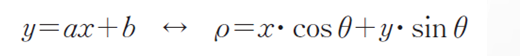


1-2. 허프변환의 단계 
    1). 극 좌표계로 누적행렬
    2) 영상화소의 직선 검사
    3) 직선 좌표에 대한 극좌표 누적 행렬
    4) 누적 행렬의 지역 최댓값 선정
    5) 직선 선별 - 임계값 이상인 누적값 선택 및 내림차순으로 정렬  

In [ ]:
1-3. 허프변환의 활용
  - 직선검출  : 영상내에 공간 구조로 검출
    
  - 직선 검출 후 응용    :   차선, 장애물 자동인식 시스템 - 차선검출 , 스캐너 기능 대신 앱[네개 모서리 검출], 음계 탐색     
  
-  문제점  ( 직교좌표에 문제점  ) : 
    수직선일 경우에 기울기가 무한대 
    검출되는 직선의 간격이 동일하지 않아서 검출 속도 및 정밀도에서 문제가 발생할 수 있다. 

In [ ]:
 2. 코너 검출 : 영상에서 경계가 만나는 지점의 특정한 모양을 갖는 곳을 가르킨다. 
    - 코너 정보들 중에서 영상의 왜곡에도 불변하는 특징을 가진 지점들이 영상 매칭에 사용된다.  
    - 해리스 코너 검출 : 영상의 평행이동, 회전변화 불변(invariant), 어파인(affine)변환 , 조명 변화도 추출할 수 있다. 
        
    

In [3]:
# 모듈을 임포트 해보자  
# ex01) 동영상 로드  
import numpy as np
import cv2

filepath  ="c:\\myImg\\01_People.avi"
#동영상 로드  
cp = cv2.VideoCapture(filepath) 
while(cp.isOpened()):
    #프레임으로 리턴
    ret , frame = cp.read()
    #print(type(ret), type(frame))
    # 확인
    if ret:
       cv2.imshow("MyFrame",frame)
       cv2.waitKey(1)
    
    else:   
       cp.release()  

cv2.destroyAllWindows()

In [4]:
# 모듈을 임포트 해보자  
# ex02) 동영상 로드를 해서 움직임을 포착해보자.  
import numpy as np
import cv2

filepath  ="c:\\myImg\\output.avi"
#동영상 로드  
cp = cv2.VideoCapture(filepath) 

avg =None
while True :
      ret,frame = cp.read()
      if not ret:
        break        
      
      gray  = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      
      if avg is None:
            avg = gray.copy().astype("float") #이미지 영상의 ndarray를 float로 변환 후 반복 실행
            continue
     
      cv2.accumulateWeighted(gray, avg, 0.6) 
      fromDelta = cv2.absdiff(gray, cv2.convertScaleAbs(avg))
     
      thresh = cv2.threshold(fromDelta, 3,255 , cv2.THRESH_BINARY)[1]
      contours, hierarchy  = cv2.findContours(thresh.copy() ,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        
      frame = cv2.drawContours(frame, contours ,  -1, (0,255,0),3 )
      cv2.imshow("MyFrame",frame)
      cv2.waitKey(1)           
    
cv2.destroyAllWindows()

 3. 동영상 로드    : cv2.VideoCapture  :  help(cv2.VideoCapture)
                     cv2.accumulateWeighted(src, dst, alpha[, mask]) -> dst  #이미지의 가중 평균값을 구하는 함수
                     cv2.absdiff(src1, src2[, dst]) -> dst
                     cv2.threshold(src, thresh, maxval, type[, dst]) -> retval, dst
                     cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy                                  cv2.drawContours() 
                     
                     
 4. 카메라 가져오기
 5. 동영상 사이즈 ,FPS, 프레임 리턴, 설정
 6. 영상 녹화(웹카메라)
 7. SAD,SSD, NCC  

In [31]:
#ex03) cv2.accumulateWeighted(src, dst, alpha[, mask])  
#대상이미지[mask]를 만들어서 가중평균을 원하는 색깔로 요청해보자 
import numpy as np
import cv2
from matplotlib import  pyplot as plt


accuimg   = np.zeros(2, dtype =np.float32)
img   = np.empty((0,2))

#mask
mask = np.array ([255,0],dtype =np.uint8)

for i in range(20):
     newimg =np.array([255,255], dtype = np.float32)
     cv2.accumulateWeighted(newimg,accuimg,0.1, mask =mask )   
     img =np.append(img, [accuimg ], axis =0)
        
plt.plot(img[ :,0], label ="mask :255", color ="red")
plt.plot(img[ :,1], label ="mask :0", color ="blue")
plt.legend()
plt.show()

# accumulateWeighted()을 실행하게 될 경우 mask데이터에서 지정된 값에 따라  
#  0이 지정된 픽셀 은  가중 평균이 되지 않고 이전값이 저장, 1이 지정된 픽셀은 가중 평균된 값이
#  업데이트가 된다.  



[255   0]


가중치 : 값은 동일하지만 상황에 따라 다르게 적용되는 값   3
가중치를 이용해서 평균값을 구하는 것을 가중평균이라고 한다. 


data01,data02,data03 .... datan  에 대한 가중치
t1,    t2,    t3 ..... tn 이라면    가중치의 합은   t1+ t2+ t3 +tn   = t_hap  
가중평균   =   (data01* t1 ) +   (data02* t2 ) + (data03* t3 )  + (datan* tn )    / t_hap 

SDS는 서류점수 30% 면접점수50%   영어점수 20%

ex)    서류점수  면접점수   코딩점수       
길동   100         80          60        = 100+80+60 /3 = 80 
SDS    30          50           20        =100 

 ===============> SDS : 가중평균  (100 *30+ 80*50 + 60*20)  /100  = 82점  
                  LG  :                  70 
 

 


In [2]:
#ex04  4. 카메라 가져오기 
import numpy as np
import cv2

#동영상 로드  
cp = cv2.VideoCapture(0) 
while(cp.isOpened()):
    #프레임으로 리턴
    ret , frame = cp.read()
    #print(type(ret), type(frame))
    # 확인
    if ret:
       cv2.imshow("MyFrame",frame)
       cv2.waitKey(1)
    
    else:   
       cp.release()  

cv2.destroyAllWindows()


KeyboardInterrupt: 

In [5]:
import numpy as np
import cv2

filepath  ="c:\\myImg\\01_People.avi"
#동영상 로드  
cp = cv2.VideoCapture(filepath) 

#속성값을 확인 해보자 
width  =  cp.get(cv2.CAP_PROP_FRAME_WIDTH)
height =  cp.get(    cv2.CAP_PROP_FRAME_HEIGHT)
fps =   cp.get(       cv2.CAP_PROP_FPS)
frame_num =   cp.get(  cv2.CAP_PROP_FRAME_COUNT)

print(width, height, fps, frame_num)

play_time = frame_num / fps 
print("play_time [sec]",play_time )


640.0 480.0 24.0 497.0
play_time [sec] 20.708333333333332


In [8]:
#ex05)  비디오 속성값을 변경한 avi 를 실행해보자 .
import numpy as np
import cv2

filepath  ="c:\\myImg\\01_People.avi"
#동영상 로드  
cp = cv2.VideoCapture(filepath) 

print( cp.set(cv2.CAP_PROP_FRAME_WIDTH,50))
print(cp.set(cv2.CAP_PROP_FRAME_HEIGHT,400))
print(cp.set(cv2.CAP_PROP_FPS,20))

print(cp.get(cv2.CAP_PROP_FPS))
while(cp.isOpened()):
    #프레임으로 리턴
    ret , frame = cp.read()
    #print(type(ret), type(frame))
    # 확인
    if ret:
       cv2.imshow("MyFrame",frame)
       cv2.waitKey(1)
    
    else:   
       cp.release()  

cv2.destroyAllWindows()


False
False
False
24.0


In [9]:
#ex06)  비디오 캠을 실행해서 속성값을 리턴받아보자  .
import numpy as np
import cv2

#filepath  ="c:\\myImg\\01_People.avi"
#동영상 로드  

cp = cv2.VideoCapture(0) 
print( cp.set(cv2.CAP_PROP_FRAME_WIDTH,50))
print(cp.set(cv2.CAP_PROP_FRAME_HEIGHT,400))
print(cp.set(cv2.CAP_PROP_FPS,10))

print(cp.get(cv2.CAP_PROP_FPS))
while(cp.isOpened()):
    #프레임으로 리턴
    ret , frame = cp.read()
    #print(type(ret), type(frame))
    # 확인
    if ret:
       cv2.imshow("MyFrame",frame)
       cv2.waitKey(1)
    
    else:   
       cp.release()  

cv2.destroyAllWindows()


True
True
True
1.0


In [5]:
#ex07)영상 녹화를  해보자   #cv.VideoWriter(	filename, fourcc, fps, frameSize[, isColor]	)
import numpy as np
import cv2
cp = cv2.VideoCapture(0) 
fps =30

size=(640,480)

#동영상 설정 출력파일 

fourcc  = cv2.VideoWriter_fourcc(*'XVID')  #  ('X','V','I','D')
video=cv2.VideoWriter('c:\\myImg\\output.avi',fourcc,fps,size)

while(cp.isOpened()):
    #프레임으로 리턴
    ret , frame = cp.read()
    #print(type(ret), type(frame))
    # 확인

    if ret:
        cv2.imshow('MyFrame', frame)
        video.write(frame)        
        if cv2.waitKey(1) == ord('q'):
              break      

cp.release()  
video.release()
cv2.destroyAllWindows()

In [ ]:
#ex08)doc 코드를 확인
from __future__ import print_function
import cv2 as cv
import argparse

parser = argparse.ArgumentParser(description='This program shows how to use background subtraction methods provided by \
                                              OpenCV. You can process both videos and images.')

parser.add_argument('--input', type=str, help='Path to a video or a sequence of image.', default='c:\\myImg\\01_People.avi')
parser.add_argument('--algo', type=str, help='Background subtraction method (KNN, MOG2).', default='MOG2')
args = parser.parse_args()

if args.algo == 'MOG2':
    backSub = cv.createBackgroundSubtractorMOG2()
else:
    backSub = cv.createBackgroundSubtractorKNN()

    
    
capture = cv.VideoCapture(cv.samples.findFileOrKeep(args.input))

if not capture.isOpened():
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break

    fgMask = backSub.apply(frame)

    cv.rectangle(frame, (10, 2), (100, 20), (255, 255, 255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)

    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

프레임 차분법에 의한 이동 물체의 검출 원리와 특징, 계산식
[1단계] 연속 3 장의 사진 I1, I2, I3을 제공
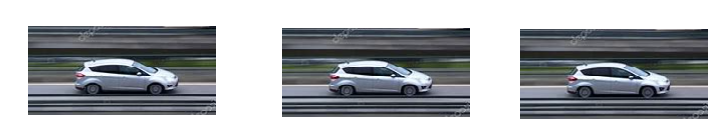

[2단계] I1와 I2, I2와 I3각각의 차이의 절대 값을 계산하여 차등 이미지를 2장을 설정 ( Id1,Id2) 

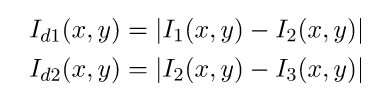


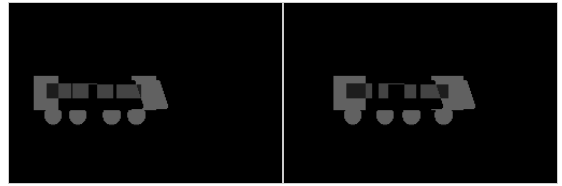

[3단계]
  차등 이미지 Id1 Id2의 교집합을 계산하고 논리적 이미지 Ia를 설정.
  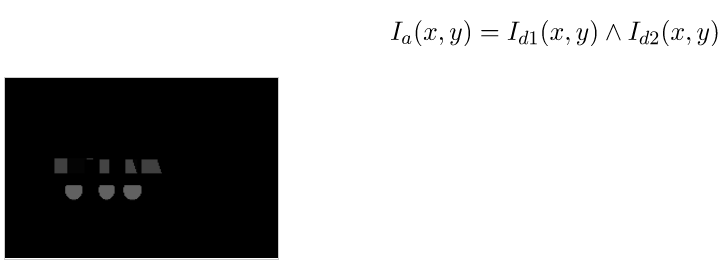
 [4단계]
 논리적 이미지 Ia를 처리하고  배경 (검은 색)과 전경 (백색)으로 나눈 마스크 이미지 ( Im)을 만든다
 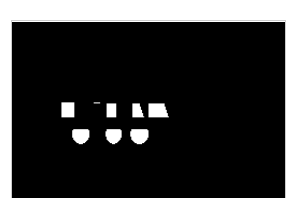
 

In [ ]:
#ex09) 차분법을 이용한 배경과 이미지를 분리해서 탐색  
import cv2
import numpy as np
import time

i = 0 # 카운트 변수
th = 30 # 차분 이미지의 한계

cap = cv2.VideoCapture ("c:\\myImg\\01_People.avi")# 동영상 파일 캡처

ret, bg = cap.read () # 첫 번째 프레임을 배경 이미지로 설정 

# 그레이 스케일 변환
bg = cv2.cvtColor (bg, cv2.COLOR_BGR2GRAY)

while (cap.isOpened ()) :
    # 프레임의 취득
    ret, frame = cap.read ()

    # 그레이 스케일 변환
    gray = cv2.cvtColor (frame, cv2.COLOR_BGR2GRAY)

    # 차이의 절대 값을 계산
    mask = cv2.absdiff (gray, bg)

    # 차등 이미지를 두 값의  마스크 이미지를 산출
    mask [mask < th] = 0
    mask [mask >= th] = 255

    # 프레임과 마스크 이미지보기
    cv2.imshow ( "Mask", mask)
    cv2.imshow ( "Flame",gray)
    cv2.imshow ( "Background",bg)   
    

    # 대기 (0.03sec)
    time.sleep (0.03)
    i += 1 # 카운트를 1 증가

    # 배경 이미지 업데이트 (간격)
    if (i> 30) :
        ret, bg = cap.read ()
        bg = cv2.cvtColor (bg, cv2.COLOR_BGR2GRAY)
        i = 0 # 카운트 변수의 초기화
      
    if cv2.waitKey (1) & 0xFF == ord ( 'q') :  # q 키를 누를 때 도중에 종료
        break

cap.release ()
cv2.destroyAllWindows ()

In [ ]:
# ex10) 감시카메라등에서 움직이는 물체를 악성 물질이라 탐지하고 사진으로 찍어서 저장해보자. 

#1. 차분법을 이용한 함수로  생성  MyFrame_sub(frame1, frame2,frame3) 
def MyFrame_sub(frame1, frame2,frame3 , th) :
     #1-1 프레임의 절대 차이 값 지정 
     diff01 = cv2.absdiff (frame1, frame2)
     diff02 = cv2.absdiff (frame2, frame3)
    
     #1-2  차분 이미지 교집합  
     diff_res = cv2.bitwise_and(diff01, diff02)  
    
     # 차등 이미지를 두 값의  마스크 이미지를 산출
     diff_res [diff_res < th] = 0
     diff_res [diff_res >= th] = 255
        
      #블러링 작업     
      mask  = cv2.medianBlur(diff_res,5)
      return diff_res
   

#2. 악성물질 (의심물체) 을 판정값  
fw = 1000 

#3. 카메라 연결
cap = cv2.VideoCapture (0)# 동영상 파일 캡처

#4. 프레임 세개를 지정한 후 흑백으로 변경 
f1=cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
f2=cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
f3=cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)

CNT =0  #반복문안에 파일이름으로 카운트,, frame0.jpg  , frame1.jpg

while cap.isOpened():
#5 .영상을 읽어서 MyFrame_sub(frame1, frame2,frame3) 으로 차분을 한다. 
   mask = MyFrame_sub(f1, f2,f3 , th=10)
    
#6. 5번의 결과로 얻은 이미지 하얀색만 픽셀수를 추출   cv2.countNonZero() 
   res =  cv2.countNonZero(mask)  

#7.  6번의 결과값 res 2번 fw 보다 크면 의심물체로 판정후 이미지 저장  
   if res > fw :
        print("의심된다 저 물체  :" ,CNT)
        filename = "c:\\mytest\\frame" +str(CNT)+".jpg"
        cv2.imwrite(filename,f2)
        CNT += 1

#8. 프레임을 확인       
    cv2.imshow ( "Frame2", f2)
    cv2.imshow ( "Mask",mask)
   
#9.배경이미지 업데이트  
    f1=f2
    f2=f3
    f3=cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
        
    if cv2.waitKey (1) & 0xFF == ord ( 'q') :  # q 키를 누를 때 도중에 종료
         break

cap.release ()
cv2.destroyAllWindows ()

영상(동적인 이미지)인 상황에서 이동물체 감지_ 컬러추적 
 - HSV 색공간을 활용한다.  
 - EX) 빨강의 범위를 살펴보자  
   빨강의 범위           OPENCV 빨강의 범위 
H  0~60,300~360도        0~30, 150~179 
S  50~100%               128~ 255
V  0~100%                 0 ~ 255

-Ex)파랑의 범위  [조현정]
-Ex)그린의 범위 [손기훈]  

In [ ]:
import numpy as np
import cv2
#ex11) Hsv형식의 컬러를 이용해서 물체 감지를 해보자  
#1. 사용자 함수를 생성한다음  넘겨받은 이미지를  hvs컬러 공간을 만들자.  [빨강]
    
def myColor(img):
     #1-1 . img의 색공간을  hsv로 변경
     hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  
     
    #1-2 .HSV 영역에서 빨강색 공간 치역  1
    hsv_min= np.array([0,127,0])
    hsv_max=np.array([30,255,255])
    mask1= cv2.inRange(hsv_img,hsv_min,hsv_max)
    
    #1-3 .HSV 영역에서 빨강색 공간 치역  2
    hsv_min= np.array([150,127,0])
    hsv_max= np.array([179,255,255])
    mask2= cv2.inRange(hsv_img,hsv_min,hsv_max)    
    return (mask1+ mask2)   

#2. 카메라 캡처
filepath  ="c:\\myImg\\01_People.avi"
#동영상 로드  
cp = cv2.VideoCapture(filepath) 

while(cp.isOpened()):
    #프레임으로 리턴
    ret , frame = cp.read()    
    #3. 데이터 읽어서 1번의 함수를 통해 값을 변환 [빨강영역 추출]
    mask_res =myColor (frame)    
    
    #4. 결과 보기 
    cv2.imshow("MyFrame",frame)
    cv2.imshow("mask",mask_res )
     
    if cv2.waitKey (1) & 0xFF == ord ( 'q') :  # q 키를 누를 때 도중에 종료
         break
        
cp.release() 
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
import time
#ex12) Hsv형식의 컬러를 이용해서 물체 감지를 해보자 .움직이는 대상에 원하는 위치에 동그라미를 그려서  
# 위치를 csv에 파일 저장해보자 
# connectedComponentsWithStats(image[, labels[, stats[, centroids[, connectivity[, ltype]]]]]) -> retval, labels, stat
#          s, centroids

#1. 사용자 함수를 생성한다음  넘겨받은 이미지를  hvs컬러 공간을 만들자.  [빨강]
   
def myColor(img):
     #1-1 . img의 색공간을  hsv로 변경
     hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  
     
    #1-2 .HSV 영역에서 빨강색 공간 치역  1
    hsv_min= np.array([0,127,0])
    hsv_max=np.array([30,255,255])
    mask1= cv2.inRange(hsv_img,hsv_min,hsv_max)
    
    #1-3 .HSV 영역에서 빨강색 공간 치역  2
    hsv_min= np.array([150,127,0])
    hsv_max= np.array([179,255,255])
    mask2= cv2.inRange(hsv_img,hsv_min,hsv_max)    
    return mask1+ mask2 
    
    #1-4. 지정된 마스크 구현   cv2.dilate()  , cv2.erode()
    '''
    mask=mask1+ mask2
    kernel = np.ones((6,6),np.uint8)
    mask = cv2.dilate(mask,kernel) # 외곽의 1
    mask = cv2.erode(mask,kernel) #외곽의 0
    return mask
    '''

    
#추가 함수    connectedComponentsWithStats(i  
def my_calc(mask)  :
    if np.count_nonzero(mask)  <=0 :
        return (-20,-20)
     
    lable = cv2.connectedComponentsWithStats(mask)
    n=lable[0]-1
    data = np.delete(lable[2],0,0)
    center=np.delete(lable[3],0,0)
    max_index = np.argmax(data[: ,4])
    return center[max_index]      
    
#2. 카메라 캡처
filepath  ="c:\\myImg\\01_People.avi"
#동영상 로드  
cp = cv2.VideoCapture(filepath) 
data=[]
start = time.time()
while(cp.isOpened()):
    #프레임으로 리턴
    ret , frame = cp.read()    
    #3. 데이터 읽어서 1번의 함수를 통해 값을 변환 [빨강영역 추출]
    mask_res =myColor (frame)    
    x,y = my_calc(mask_res)
    data.append([time.time()-start , x, y])
    
    #3-1 동그라미그리자 
    cv2.circle(frame, (int(x),int(y)) , 20,(0,0,255), 10)   
    
    #4. 결과 보기 
    cv2.imshow("MyFrame",frame)
    cv2.imshow("mask",mask_res )
     
    if cv2.waitKey (1) & 0xFF == ord ( 'q') :  # q 키를 누를 때 도중에 종료
         break
            
    #5. 파일저장
    np.savetxt("c:\\mytest\\data.csv",np.array(data),delimiter =",")
        
cp.release() 
cv2.destroyAllWindows()